In [23]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
import plotly.express as graph
import re
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from nltk.stem import WordNetLemmatizer

In [24]:
data1 = pd.read_csv('../data/final_data.csv',delimiter=";")
data = data1.to_numpy()

## Data Analysis

In [25]:
# shape of data
print("Dimensions of Dataset: ",data.shape)
print("\n\n")

countCategory=data1.type.value_counts()
print('\n')

# count of types
print("No of posts for each mbti Personality: \n")
print(countCategory)


Dimensions of Dataset:  (106067, 9)





No of posts for each mbti Personality: 

type
INTP    24961
INTJ    22427
INFJ    14963
INFP    12134
ENTP    11725
ENFP     6167
ISTP     3424
ENTJ     2955
ESTP     1986
ENFJ     1534
ISTJ     1243
ISFP      875
ISFJ      650
ESTJ      482
ESFP      360
ESFJ      181
Name: count, dtype: int64


Axes(0.125,0.11;0.775x0.77)




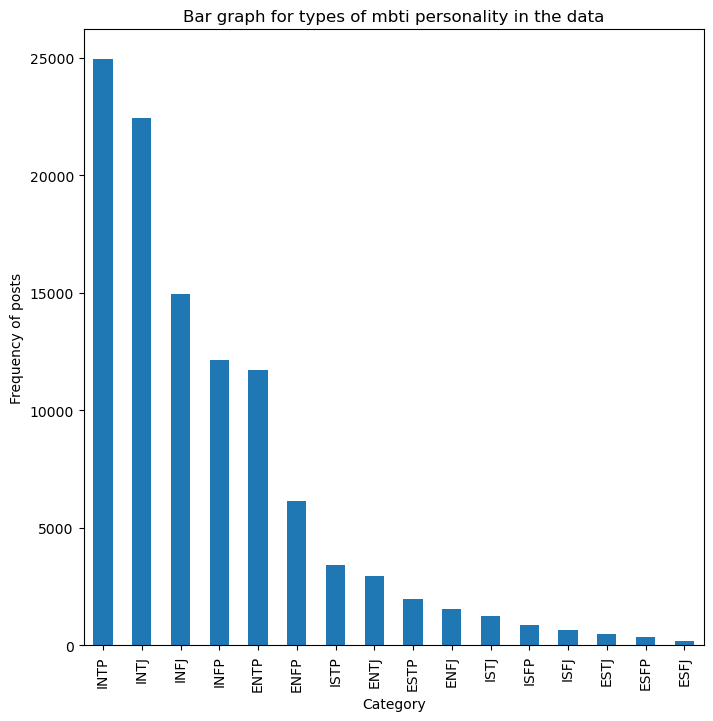

In [26]:
# type counts bar graph and pie graph
# bar Graph
print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of mbti personality in the data'))
print("\n")
#pie graph
graph.pie(data1,names='type',title='Pie graph for types of mbti personality in the data', height=600, width=600)


In [62]:
# counts for each classification
# commented out barplots

countCategory=data1.auxilary.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of auxiliary functions in the data'))
print("No of posts for each auxiliary function: \n")
print(countCategory)

countCategory=data1.dominant.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of dominant functions in the data'))
print("No of posts for each dominant function: \n")
print(countCategory)

countCategory=data1.irrat_dominant.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of irrational dominant functions in the data'))
print("No of posts for each dominant irrational function: \n")
print(countCategory)

countCategory=data1.rat_dominant.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of rational dominant functions in the data'))
print("No of posts for each dominant rational function: \n")
print(countCategory)

countCategory=data1.rationals.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of rational functions in the data'))
print("No of posts for each rational function combination: \n")
print(countCategory)

countCategory=data1.irrationals.value_counts()
#print(countCategory.plot(kind='bar',figsize=(8,8),xlabel='Category',ylabel='Frequency of posts', title='Bar graph for types of irrational functions in the data'))
print("No of posts for each irrational function combination: \n")
print(countCategory)

No of posts for each auxiliary function: 

auxilary
Ne    37095
Te    23670
Fe    15613
Ti    13711
Fi     6527
Ni     4489
Se     4299
Si      663
Name: count, dtype: int64
No of posts for each dominant function: 

dominant
Ni    37390
Ti    28385
Ne    17892
Fi    13009
Te     3437
Se     2346
Si     1893
Fe     1715
Name: count, dtype: int64
No of posts for each dominant irrational function: 

irrat_dominant
Ne    54987
Ni    41879
Se     6645
Si     2556
Name: count, dtype: int64
No of posts for each dominant rational function: 

rat_dominant
Ti    42096
Te    27107
Fi    19536
Fe    17328
Name: count, dtype: int64
No of posts for each rational function combination: 

rationals
FeTi    59424
TeFi    46643
Name: count, dtype: int64
No of posts for each irrational function combination: 

irrationals
NeSi    57543
SeNi    48524
Name: count, dtype: int64


## Data Processing

In [28]:
mbti_words =  ['infj', 'entp', 'intp', 'intj', 'entj', 'enfj', 'infp', 'enfp', 'isfp', 'istp', 'isfj', 'istj', 'estp', 'esfp', 'estj', 'esfj',"fe", "fi", "te", "ti", "se", "si", "ne", "ni"]
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in mbti_words])
    data[i, 1] =  post_temp

In [29]:
remove_words = stopwords.words("english")
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    post_temp=" ".join([w for w in post_temp.split(' ') if w not in remove_words])
    data[i, 1] = post_temp


In [30]:
#removing special characters
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    pattern = re.compile('\W+')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[0-9]')
    post_temp= re.sub(pattern, ' ', post_temp)
    pattern = re.compile(r'[_+]')
    post_temp= re.sub(pattern, ' ', post_temp)
    data[i, 1] = post_temp

<>:3: SyntaxWarning:

invalid escape sequence '\W'

<>:3: SyntaxWarning:

invalid escape sequence '\W'

C:\Users\bw443\AppData\Local\Temp\ipykernel_35860\2057662621.py:3: SyntaxWarning:

invalid escape sequence '\W'



In [31]:
#removing extra spaces from texts.
for i in range(data.shape[0]):
    post_temp=data[i, 1]
    pattern = re.compile('\s+')
    post_temp= re.sub(pattern, ' ', post_temp)
    data[i, 1] = post_temp

<>:4: SyntaxWarning:

invalid escape sequence '\s'

<>:4: SyntaxWarning:

invalid escape sequence '\s'

C:\Users\bw443\AppData\Local\Temp\ipykernel_35860\489863438.py:4: SyntaxWarning:

invalid escape sequence '\s'



In [32]:
# lemmatization

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    # tokenize the text into words
    words = text.split()

    # lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # recombine the words into a single string
    return " ".join(lemmatized_words)

for i in range(data.shape[0]):
    post_temp = data[i, 1]
    post_temp = lemmatize_text(post_temp)
    data[i, 1] = post_temp

In [33]:
# vectorizing the data
vectorizer = TfidfVectorizer() 
X = vectorizer.fit_transform(data[:,1])
label_encoder = LabelEncoder()

In [34]:
# defining the classes 
# encoding classes

rationals_labels = data[:,7]
y_rationals = label_encoder.fit_transform(rationals_labels)

irrationals_labels = data[:,8]
y_irrationals = label_encoder.fit_transform(irrationals_labels)

dom_labels = data[:,3]
y_dominant = label_encoder.fit_transform(dom_labels)

aux_labels = data[:,4]
y_auxilary = label_encoder.fit_transform(aux_labels)

ratdom_labels = data[:, 5]
y_ratdominant = label_encoder.fit_transform(ratdom_labels)

irratdom_labels = data[:, 6]
y_irratdominant = label_encoder.fit_transform(irratdom_labels)

## Modeling

In [35]:
undersampler = RandomUnderSampler(random_state=42)
smote = SMOTE(random_state=42)

### Logistic Regression Modeling

#### Rational Functions Logistic Regression Model

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rationals, test_size=0.2, random_state=42) # data splitting

LR_model = LogisticRegression() # train the model
LR_model.fit(X_train, y_train) # fit the model

LR_preds = LR_model.predict(X_test) # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

trained accuracy score: 0.84
tested accuracy score: 0.78
f-score: 0.78


[Text(0, 0, 'FeTi'), Text(0, 1, 'TeFi')]

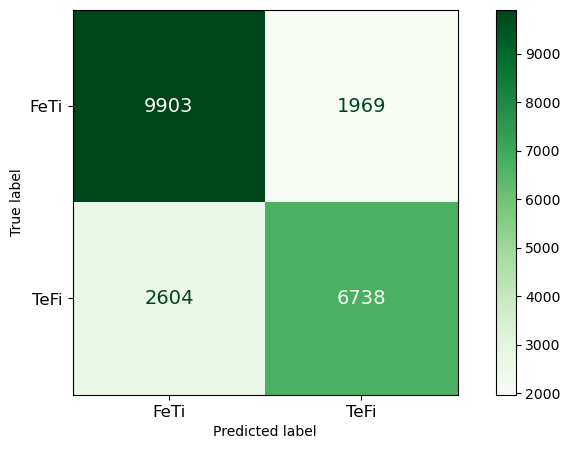

In [37]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["FeTi","TeFi"], fontsize=12)
ax.yaxis.set_ticklabels(["FeTi","TeFi"], fontsize=12)
#plt.savefig("LR_rational.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Irrational Functions Logistic Regression Model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irrationals, test_size=0.2, random_state=42)  # data splitting

LR_model = LogisticRegression()  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#79 w/ smote
#79 w/o smote

trained accuracy score: 0.85
tested accuracy score: 0.79
f-score: 0.79


[Text(0, 0, 'NeSi'), Text(0, 1, 'SeNi')]

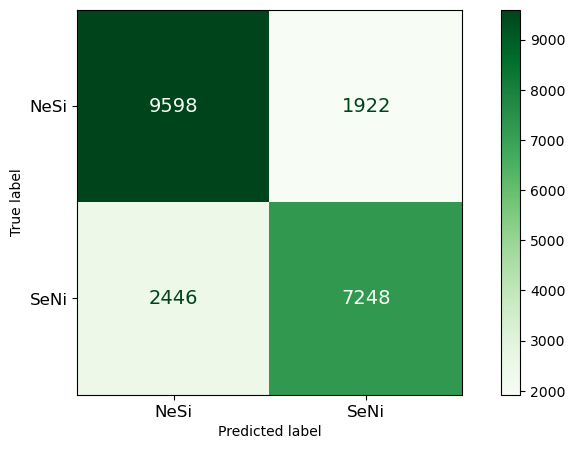

In [61]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
ax.yaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
#plt.savefig("LR_irrational.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Dominant Functions Logistic Regression Model


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dominant, test_size=0.2, random_state=42)  # data splitting

LR_model = LogisticRegression()  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#73 w/ smote
#73 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.81
tested accuracy score: 0.73
f-score: 0.73


[Text(0, 0, 'Fe'),
 Text(0, 1, 'Fi'),
 Text(0, 2, 'Ne'),
 Text(0, 3, 'Ni'),
 Text(0, 4, 'Se'),
 Text(0, 5, 'Si'),
 Text(0, 6, 'Te'),
 Text(0, 7, 'Ti')]

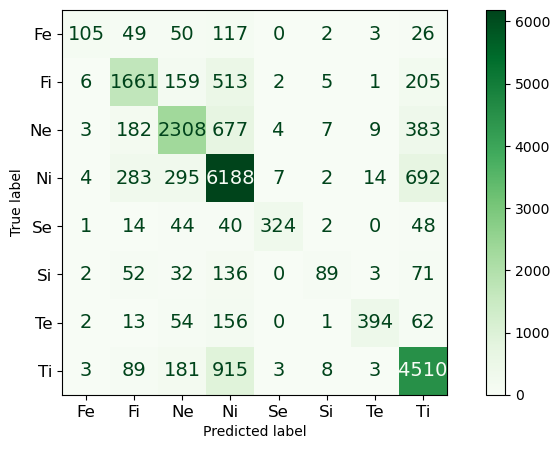

In [41]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
#plt.savefig("LR_dominant.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Auxiliary Functions Logistic Regression Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxilary, test_size=0.2, random_state=42)  # data splitting

LR_model = LogisticRegression()  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#72 w/ smote
#73 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.81
tested accuracy score: 0.73
f-score: 0.73


[Text(0, 0, 'Fe'),
 Text(0, 1, 'Fi'),
 Text(0, 2, 'Ne'),
 Text(0, 3, 'Ni'),
 Text(0, 4, 'Se'),
 Text(0, 5, 'Si'),
 Text(0, 6, 'Te'),
 Text(0, 7, 'Ti')]

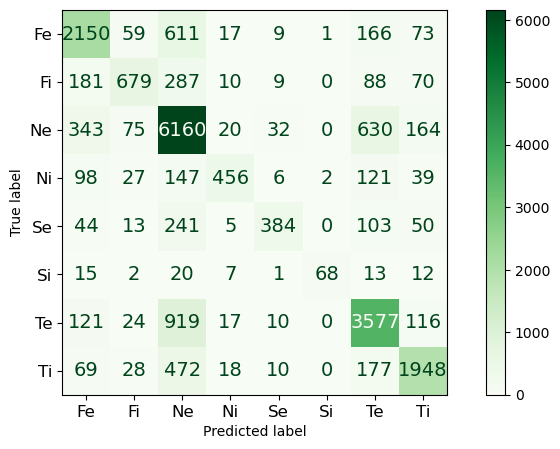

In [43]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
#plt.savefig("LR_auxiliary.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Rational Dominant Functions Logistic Regression Model

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ratdominant, test_size=0.2, random_state=42)  # data splitting

LR_model = LogisticRegression()  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.86
tested accuracy score: 0.78
f-score: 0.78


[Text(0, 0, 'Fe'), Text(0, 1, 'Fi'), Text(0, 2, 'Te'), Text(0, 3, 'Ti')]

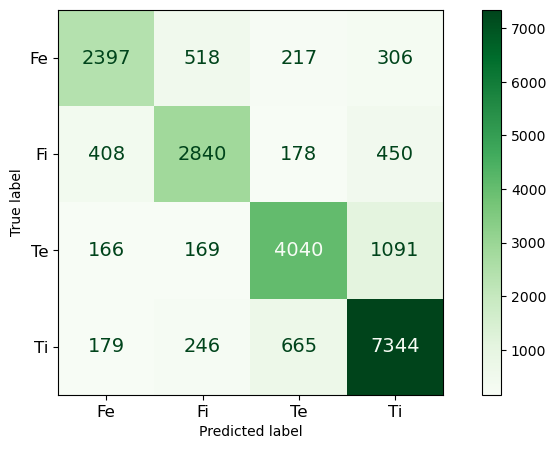

In [45]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Te","Ti"], fontsize=12)
#plt.savefig("LR_rational_dom.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Irrational Dominant Functions Logistic Regression Model

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irratdominant, test_size=0.2, random_state=42)  # data splitting

LR_model = LogisticRegression()  # train the model
LR_model.fit(X_train, y_train)  # fit the model

LR_preds = LR_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(LR_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(LR_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(LR_preds, y_test, average='micro')))

#77 w/ smote
#77 w/o smote

C:\Users\bw443\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



trained accuracy score: 0.85
tested accuracy score: 0.78
f-score: 0.78


[Text(0, 0, 'Ne'), Text(0, 1, 'Ni'), Text(0, 2, 'Se'), Text(0, 3, 'Si')]

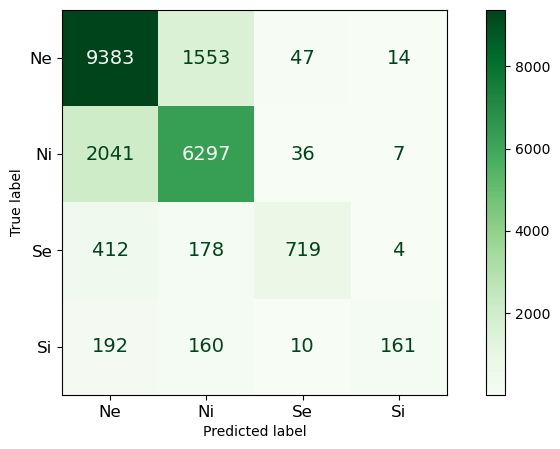

In [47]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, LR_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Ne","Ni","Se","Si"], fontsize=12)
ax.yaxis.set_ticklabels(["Ne","Ni","Se","Si"], fontsize=12)
#plt.savefig("LR_irrational_dom.png", dpi=300, bbox_inches='tight', facecolor='white')

#### SVM

#### Rational Functions SVM Model

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y_rationals, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#79 w/o smote

trained accuracy score: 0.93
tested accuracy score: 0.79
f-score: 0.79


[Text(0, 0, 'NeSi'), Text(0, 1, 'SeNi')]

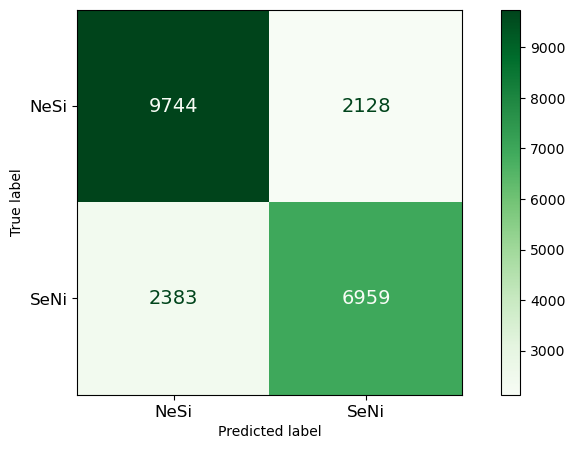

In [49]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
ax.yaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
#plt.savefig("SVM_rational.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Irrational Functions SVM Model

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irrationals, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#79 w/ smote
#80 w/o smote

trained accuracy score: 0.93
tested accuracy score: 0.80
f-score: 0.80


[Text(0, 0, 'NeSi'), Text(0, 1, 'SeNi')]

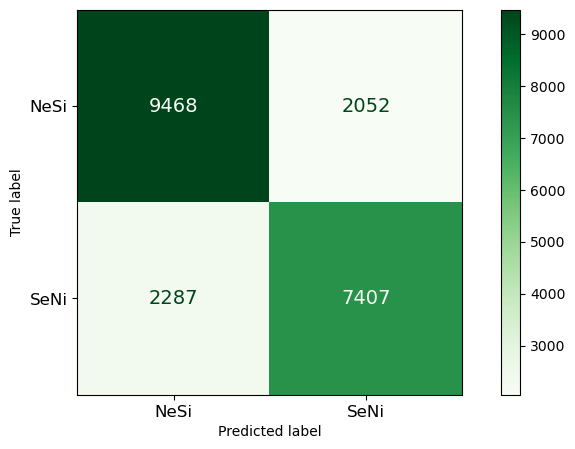

In [51]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
ax.yaxis.set_ticklabels(["NeSi","SeNi"], fontsize=12)
#plt.savefig("SVM_irrational.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Dominant Functions SVM Model

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_dominant, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#74 w/ smote
#75 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.75
f-score: 0.75


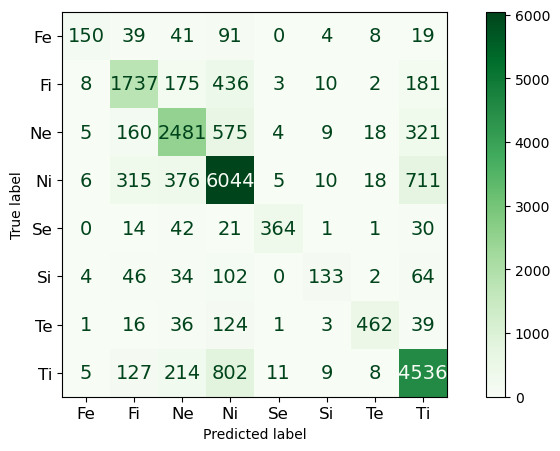

In [53]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
plt.savefig("SVM_dominant.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Auxiliary Functions SVM Model

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxilary, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#73 w/ smote
#74 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.74
f-score: 0.74


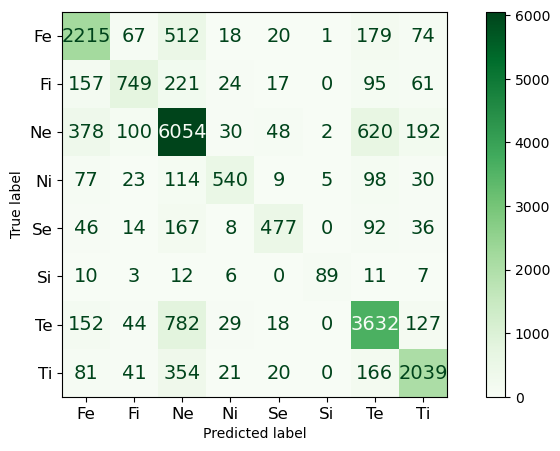

In [55]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Ne","Ni","Se","Si","Te","Ti"], fontsize=12)
plt.savefig("SVM_auxiliary.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Dominant Rational Functions SVM Model

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ratdominant, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#79 w/o smote

trained accuracy score: 0.95
tested accuracy score: 0.79
f-score: 0.79


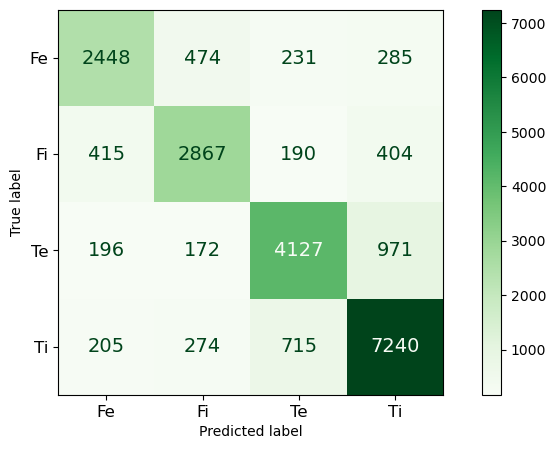

In [57]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Fe","Fi","Te","Ti"], fontsize=12)
ax.yaxis.set_ticklabels(["Fe","Fi","Te","Ti"], fontsize=12)
plt.savefig("SVM_rational_dom.png", dpi=300, bbox_inches='tight', facecolor='white')

#### Dominant Irrational Functions SVM Model

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y_irratdominant, test_size=0.2, random_state=42)  # data splitting

svm_model = LinearSVC()  # train the model
svm_model.fit(X_train, y_train)  # fit the model

svm_preds = svm_model.predict(X_test)  # create prediction array

print("trained accuracy score: {:.2f}".format(svm_model.score(X_train, y_train)))
print("tested accuracy score: {:.2f}".format(svm_model.score(X_test, y_test)))
print("f-score: {:.2f}".format(f1_score(svm_preds, y_test, average='micro')))

#78 w/ smote
#78 w/o smote

trained accuracy score: 0.94
tested accuracy score: 0.78
f-score: 0.78


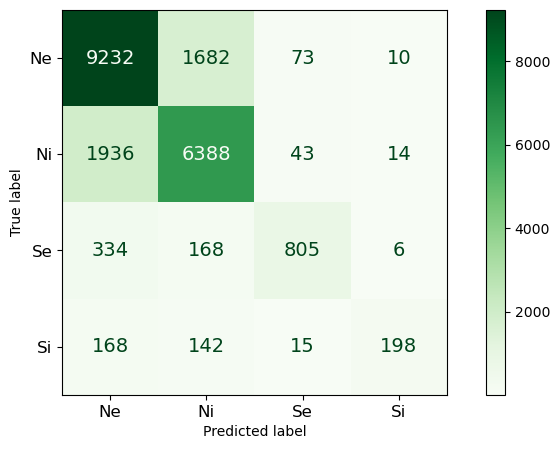

In [59]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="white")
ConfusionMatrixDisplay.from_predictions(y_test, svm_preds, ax=ax, cmap='Greens',text_kw={"fontsize": 14})
ax.xaxis.set_ticklabels(["Ne","Ni","Se","Si"], fontsize=12)
ax.yaxis.set_ticklabels(["Ne","Ni","Se","Si"], fontsize=12)
plt.savefig("SVM_irrational_dom.png", dpi=300, bbox_inches='tight', facecolor='white')